In [ ]:
# ---------- Reinforcement Learning (Q-Learning) ----------

In [ ]:
import gym        # all you have to do to import and use open ai gym

In [ ]:
env = gym.make("FrozenLake-v1")   # we are going to use the FrozenLake Environment

/usr/local/lib/python3.7/dist-packages/gym/core.py:318: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/usr/local/lib/python3.7/dist-packages/gym/wrappers/step_api_compatibility.py:40: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."


In [ ]:
print(env.observation_space.n)      # get the number of states
print(env.action_space.n)           # get the number of actions

16
4


In [ ]:
env.reset()     # reset the env to default state

0

In [ ]:
action = env.action_space.sample()  # get a random action

In [ ]:
observation, reward, done, info = env.step(action)    # take action

In [ ]:
!pip install gym[toy_text]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 18.3 MB 49 kB/s 


In [ ]:
env.render()    # render the GUI for the environment

/usr/local/lib/python3.7/dist-packages/gym/core.py:50: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/
  "You are calling render method, "


error: ignored

In [ ]:
# Building a Q-Table

import gym
import numpy as np
import time

env = gym.make("FrozenLake-v1")
STATES = env.observation_space.n
ACTIONS = env.action_space.n

/usr/local/lib/python3.7/dist-packages/gym/core.py:318: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/usr/local/lib/python3.7/dist-packages/gym/wrappers/step_api_compatibility.py:40: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."


In [ ]:
Q = np.zeros((STATES, ACTIONS))   # create a matrix with all 0 values
print(Q)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [ ]:
# Constants

EPISODES = 2000   
MAX_STEPS = 100

LEARNING_RATE = 0.81
GAMMA = 0.96

In [ ]:
# Picking an action

epsilon = 0.9     # start with a 90% chance of picking a random action
state = env.observation_space.sample()
# code to pick action
if np.random.uniform(0, 1) < epsilon:
  action = env.action_space.sample()

else:
  action = np.argmax(Q[state, :])   # use Q table to pick best action based on current values

In [ ]:
# Updating Q values

Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[observation, :]) - Q[state, action])

In [ ]:
# Putting it Together

import gym
import numpy as np
import time

env = gym.make("FrozenLake-v1")
STATES = env.observation_space.n
ACTIONS = env.action_space.n

Q = np.zeros((STATES, ACTIONS))

EPISODES = 1500
MAX_STEPS = 100

LEARNING_RATE = 0.81
GAMMA = 0.96

RENDER = False

epsilon = 0.9

/usr/local/lib/python3.7/dist-packages/gym/core.py:318: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/usr/local/lib/python3.7/dist-packages/gym/wrappers/step_api_compatibility.py:40: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."


In [ ]:
rewards = []

for episode in range(EPISODES):
  state = env.reset()

  for _ in range(MAX_STEPS):
    if RENDER:
      env.render()
    
    if np.random.uniform(0, 1) < epsilon:
      action = env.action_space.sample()
    else:
      action = np.argmax(Q[state, :])

    next_state, reward, done, _ = env.step(action)

    Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[next_state, :]) - Q[state, action])

    state = next_state
    
    if done:
      rewards.append(reward)
      epsilon -= 0.001
      break  # goal reached


print(Q)
print(f"Average reqard: {sum(rewards)/len(rewards)}")

# and now we can see our Q values!

[[3.13856680e-01 2.23524400e-02 2.19496263e-02 2.19196039e-02]
 [2.63084495e-03 4.43017576e-03 7.18383541e-03 3.59471183e-01]
 [5.33316413e-03 5.37145172e-03 8.26965210e-03 1.63500779e-01]
 [1.87450758e-03 1.78351503e-03 6.82547822e-03 1.27830556e-01]
 [3.58286352e-01 1.84349662e-02 1.30538941e-02 2.36834378e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.68376620e-06 3.68552146e-06 1.44754777e-01 3.29967854e-06]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.04885115e-03 2.95604015e-03 3.76817749e-03 3.64440011e-01]
 [4.31367129e-03 4.29782065e-01 7.17516699e-03 1.20104711e-02]
 [1.35635624e-01 1.00183853e-03 1.30890948e-03 7.74665624e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.98922701e-02 7.86508227e-02 5.80839750e-01 2.94288335e-02]
 [1.56328100e-01 9.24349386e-01 5.30921507e-02 1.12097085e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

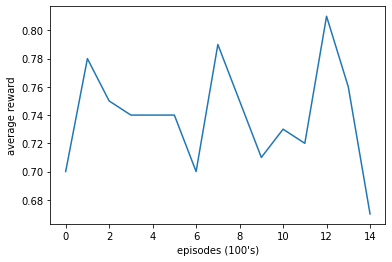

In [ ]:
# we can plot the training progress and see how the agent improved

import matplotlib.pyplot as plt

def get_average(values):
  return sum(values)/len(values)

avg_rewards = []

for i in range(0, len(rewards), 100):
  avg_rewards.append(get_average(rewards[i:i+100]))

plt.plot(avg_rewards)
plt.ylabel("average reward")
plt.xlabel("episodes (100\'s)")
plt.show()